РАССТОЯНИЕ МЕЖДУ p1 и p2: 
Расстояние Евклида:           1.4142135623730951
Квадрат Евклидова расстояния: 2.0000000000000004
Расстояние Чебышева:          1.0
Расстояние Хемминга:          2.0

РАССТОЯНИЕ МЕЖДУ p1 и p3: 
Расстояние Евклида:           5.477225575051661
Квадрат Евклидова расстояния: 30.0
Расстояние Чебышева:          5.0
Расстояние Хемминга:          8.0

РАССТОЯНИЕ МЕЖДУ p1 и p4: 
Расстояние Евклида:           15.297058540778355
Квадрат Евклидова расстояния: 234.00000000000003
Расстояние Чебышева:          11.0
Расстояние Хемминга:          26.0

РАССТОЯНИЕ МЕЖДУ p2 и p3: 
Расстояние Евклида:           4.47213595499958
Квадрат Евклидова расстояния: 20.000000000000004
Расстояние Чебышева:          4.0
Расстояние Хемминга:          6.0

РАССТОЯНИЕ МЕЖДУ p2 и p4: 
Расстояние Евклида:           14.142135623730951
Квадрат Евклидова расстояния: 200.00000000000003
Расстояние Чебышева:          10.0
Расстояние Хемминга:          24.0

РАССТОЯНИЕ МЕЖДУ p3 и p4: 
Расстояние Евкли

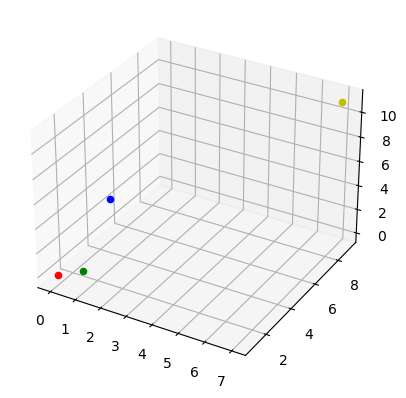

In [35]:
#1.3.1
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def print_distance(x, y):
    print("Расстояние Евклида:           ", end="")
    print(np.linalg.norm(x - y))
    print("Квадрат Евклидова расстояния: ", end="")
    print(np.linalg.norm(x - y) ** 2)
    print("Расстояние Чебышева:          ", end="")
    print(np.linalg.norm(x - y, ord=np.inf))
    print("Расстояние Хемминга:          ", end="")
    print(np.linalg.norm(x- y, ord=1))

p1 = np.array([0, 1, 0])
p2 = np.array([1, 1, 1])
p3 = np.array([1, 3, 5])
p4 = np.array([7, 9, 11])

print("РАССТОЯНИЕ МЕЖДУ p1 и p2: ")
print_distance(p1, p2)
print()

print("РАССТОЯНИЕ МЕЖДУ p1 и p3: ")
print_distance(p1, p3)
print()

print("РАССТОЯНИЕ МЕЖДУ p1 и p4: ")
print_distance(p1, p4)
print()

print("РАССТОЯНИЕ МЕЖДУ p2 и p3: ")
print_distance(p2, p3)
print()

print("РАССТОЯНИЕ МЕЖДУ p2 и p4: ")
print_distance(p2, p4)
print()

print("РАССТОЯНИЕ МЕЖДУ p3 и p4: ")
print_distance(p3, p4)
print()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(p1[0], p1[1], p1[2], c='r')
ax.scatter(p2[0], p2[1], p2[2], c='g')
ax.scatter(p3[0], p3[1], p3[2], c='b')
ax.scatter(p4[0], p4[1], p4[2], c='y')
plt.show()

In [3]:
#1.3.2
import numpy as np

matrix = np.zeros((5, 5))
matrix += np.arange(5)
print(matrix)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


accuracy: 0.978


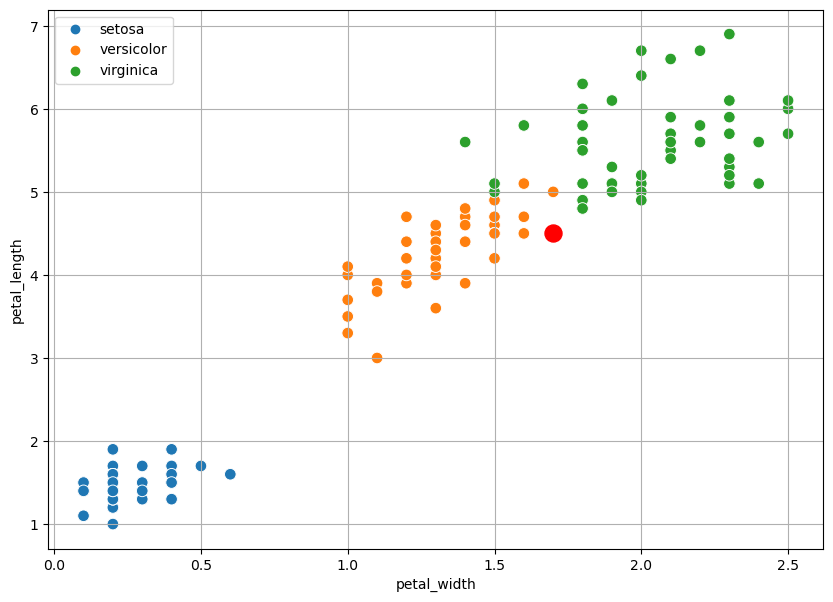

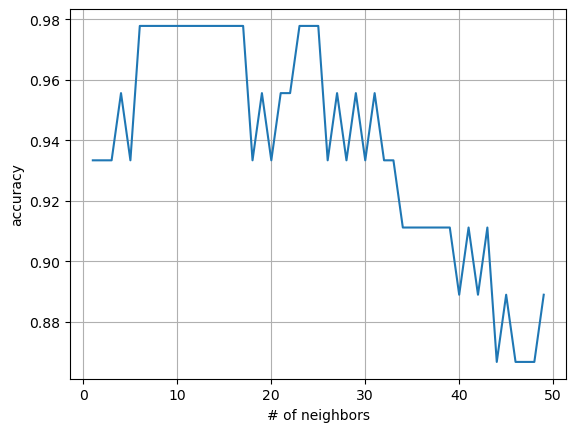

In [23]:
#2.3.1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

iris = sns.load_dataset('iris')

x_train, x_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.30
)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.legend(loc=2)
plt.grid()

model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(x_test.iloc[i, 3], x_test.iloc[i, 2], color='red', s=150)
plt.show()
        
neighbors = [i for i in range(1, 50)]
accuracies = []
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))
plt.xlabel('# of neighbors')
plt.ylabel('accuracy')
plt.grid()
plt.plot(neighbors, accuracies)

In [40]:
#3.3.2
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"синий": 1},
             {"зелёный": 1},
             {"красный": 2, "зелёный": 1, "синий": 1},
             {"красный": 1, "зелёный": 1, "синий": 1}]

dictvectorizer = DictVectorizer(sparse=False)

features = dictvectorizer.fit_transform(data_dict)
features

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 2., 1.],
       [1., 1., 1.]])